
**Problem Statment**:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.
The company wants to know :

*     Which variables are significant in predicting the demands for shared bikes?
*     How well those variables describe the bike demands?



In [134]:
# Importing essential Libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## **Data Reading,Understanding and Preparation**

In [135]:
# Read and view the Dataset
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [136]:
# Get to know about type of Data
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


* We don't need the Feature 'instant',it is just serial number of the dataset.
* We don't need the Feature 'dtday' because it is already expalained by the other features like: yr, mnth, weekday, workingday and holiday.


In [137]:
day = day.drop(['instant','dteday'],axis =1)

#### Feature: season has four levels (1:spring, 2:summer, 3:fall, 4:winter) , so it has to be encoded with the help three dummy variables



In [138]:
def mapp_season(season : int) -> str:
    if season == 1:
        return "Spring"
    elif season == 2:
        return "Summer"
    elif season == 3:
        return "Fall"
    elif season == 4:
        return "Winter"
    else:
        pass

In [139]:
#df.rename(columns = d, inplace = False)
day['season']=day['season'].apply(mapp_season)
day.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [140]:
season_desc = pd.get_dummies(day['season'],drop_first=True)
season_desc.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [141]:
season_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Spring  730 non-null    uint8
 1   Summer  730 non-null    uint8
 2   Winter  730 non-null    uint8
dtypes: uint8(3)
memory usage: 2.3 KB


In [142]:
day = pd.concat((day,season_desc),axis=1)

In [143]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Spring,Summer,Winter
0,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [144]:
#now dropping the season as it is already encoded
day=day.drop('season',axis=1)

## Feature: mnth has 12 levels (1:Jan, 2:Feb, 3:Mar, 4:Apr,5: May,6:Jun,7:Jul,8:Aug,9:Sep,10:Oct,11:Nov,12:Dec) , so it has to be encoded with the help twelve dummy variables

In [145]:
def mapp_month(month : int) -> str:
    if month == 1:
        return "Jan"
    elif month == 2:
        return "Feb"
    elif month == 3:
        return "Mar"
    elif month == 4:
        return "Apr"
    elif month == 5:
        return "May"
    elif month == 6:
        return "Jun"
    elif month == 7:
        return "Jul"
    elif month == 8:
        return "Aug"
    elif month == 9:
        return "Sep"
    elif month == 10:
        return "Oct"
    elif month == 11:
        return "Nov"
    elif month == 12:
        return "Dec"
    else:
        pass

In [146]:
day['mnth']=day['mnth'].apply(mapp_month)

In [147]:
day.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Spring,Summer,Winter
0,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [148]:
Month = pd.get_dummies(day['mnth'],drop_first=True)
Month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [149]:
day = pd.concat((day,Month),axis=1)
day.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


* Since any one of the Month can be explained by remaining other 11 Months so we can drop First one
* As we have already expanded the Levels of of the Feature 'mnth' so we don't need it.

In [150]:
day = day.drop(['mnth'],axis=1)


In [151]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   weekday     730 non-null    int64  
 3   workingday  730 non-null    int64  
 4   weathersit  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   casual      730 non-null    int64  
 10  registered  730 non-null    int64  
 11  cnt         730 non-null    int64  
 12  Spring      730 non-null    uint8  
 13  Summer      730 non-null    uint8  
 14  Winter      730 non-null    uint8  
 15  Aug         730 non-null    uint8  
 16  Dec         730 non-null    uint8  
 17  Feb         730 non-null    uint8  
 18  Jan         730 non-null    uint8  
 19  Jul         730 non-null    u

#### Understanding the Feature 'holiday'
holiday : weather day is a holiday or not , so this Feature is already encoded to Binary form where
*     1 represents it's Holiday
*     0 represents it's not a Holiday
    

#### Understanding the Feature 'weekday'
weekday : day of the week , so this Feature needs Encoding

It can be encoded as follow:

{1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday',5:'Friday',6:'Saturday',0:'Sunday'}


In [152]:
def mapp_day(day : int) -> str:
    if day == 1:
        return "Monday"
    elif day == 2:
        return "Tuesday"
    elif day == 3:
        return "Wednesday"
    elif day == 4:
        return "Thursday"
    elif day == 5:
        return "Friday"
    elif day == 6:
        return "Saturday"
    elif day == 0:
        return "Sunday"
    else:
        pass

In [153]:
day['weekday']=day['weekday'].apply(mapp_day)

In [154]:
Weekday = pd.get_dummies(day['weekday'],drop_first=True)
Weekday.head(5)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [155]:
day = pd.concat((day,Weekday),axis=1)
day.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,0,1,0,0,0,0
1,0,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,1,0,0,0
2,0,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,1,0,0,0,0,0
3,0,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,0,0,1,0
4,0,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,1


* As we have already Expanded the Feature 'weekday' so we don't need it.
* Since 'weekday" is explained by 'workingday' and 'holiday',we can drop this.

In [156]:
day = day.drop(['weekday'],axis=1)
day.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,2,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,1


#### Understanding the Feature 'workingday'
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0
* As the Feture Working Days is already Binary Encoded so no further Data Preparation is needed.

#### Understanding the Feature 'weathersit'
weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

> Since the Feature 'wethershit' has four levels so we can create  dummy Variables to represent them into Numerical forms and mapping can be done as
1: Clear
2: Mist
3: Light


In [157]:
def mapp(weathersit : int) -> str:
    if weathersit == 1:
        return "Clear"
    elif weathersit == 2:
        return "Mist"
    elif weathersit == 3:
        return "LightSnow"
    elif weathersit == 4:
        return "HeavyRain"
    else:
        pass

In [158]:
day['weathersit']=day['weathersit'].apply(mapp)

In [159]:
Weathersit = pd.get_dummies(day['weathersit'])
Weathersit.head()

,Clear,LightSnow,Mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [160]:
day = pd.concat((day,Weathersit), axis =1)
day.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,LightSnow,Mist
0,0,0,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,1,1,0,0


In [161]:
# As we don't need the Feature 'weathersit' now as we have already expanded so we can drop it
day = day.drop('weathersit',axis=1)


In [162]:
day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,LightSnow,Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,1,1,0,0


> Features such as 'temp','atemp','hum','windspeed','casual','register','cnt'and integers and it is expected them
to be as integers only.

> The Feature 'cnt' represents count of total rental bikes including both casual and registered and it is the Target variable.

## **Data Visualization**

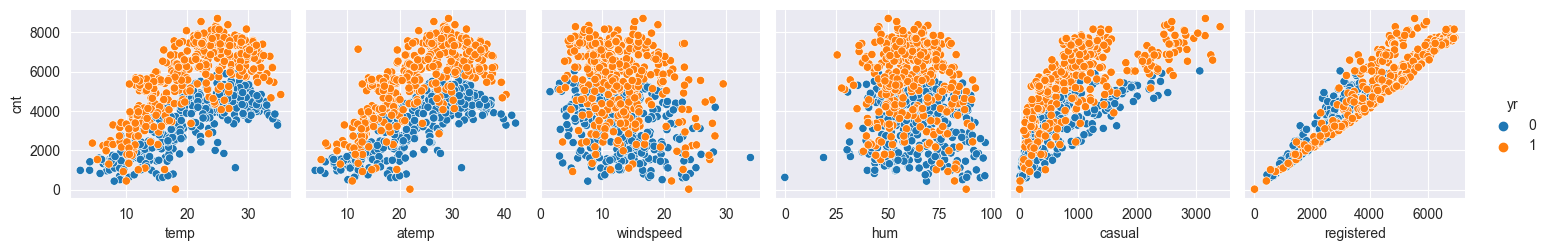

In [163]:
# Visualization of Relationship of Numerical Features against Target Variable
sns.pairplot(day, x_vars=["temp",'atemp', 'windspeed',"hum",'casual','registered'],y_vars=['cnt'],hue ='yr')
plt.show()


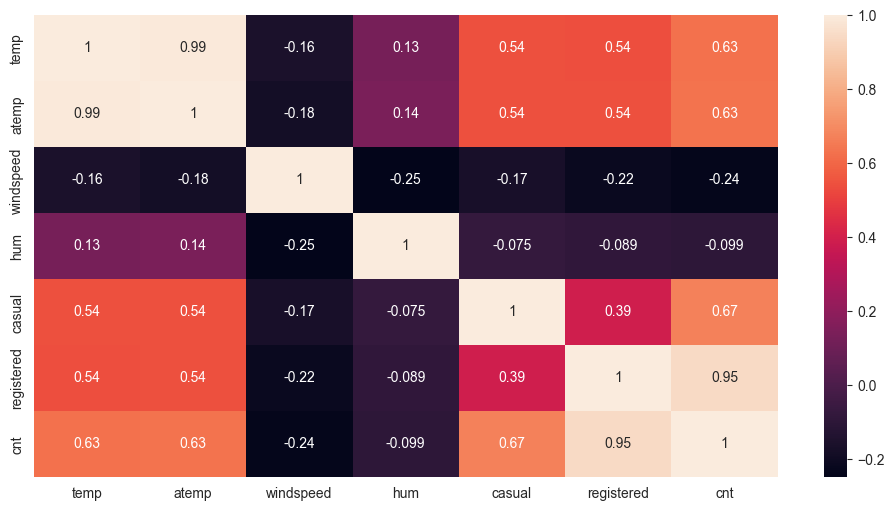

In [164]:
plt.figure(figsize = (12,6))
sns.heatmap(day[["temp",'atemp', 'windspeed',"hum",'casual','registered','cnt']].corr(),annot =True)
plt.show()

From Above two plot below are the observations:
* > Registered Bike users are more than Casual and is strongly correlated with Target Variable
* > Temp and atemp are very strongly correlated one can be dropped
* > Humidity has not much Negative effect on the Target Variable.
* > Since Registered or casual ,both variables explains the demand which is target variable.So these two can be dropped and we have cnt as the target variable.


In [165]:
day = day.drop(['atemp','casual','registered'],axis =1)

In [166]:
day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,LightSnow,Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,1,1,0,0


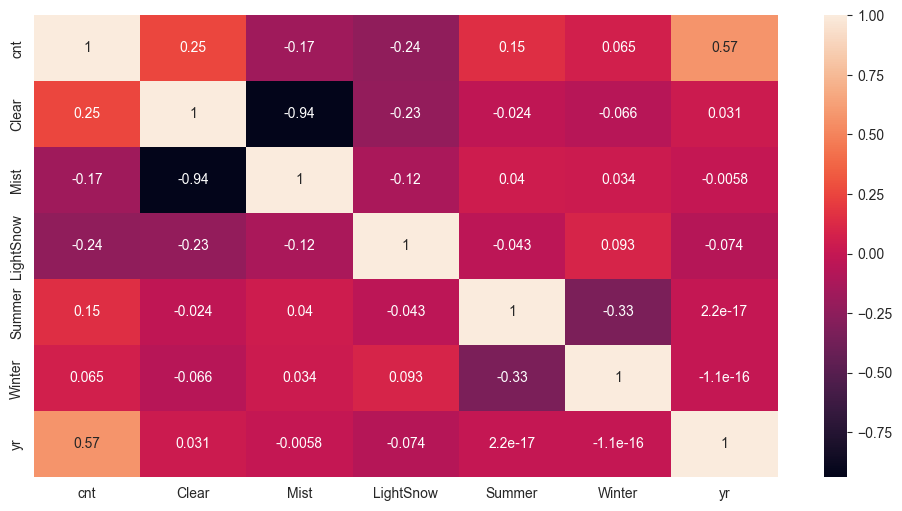

In [167]:
plt.figure(figsize = (12,6))
sns.heatmap(day[['cnt','Clear', 'Mist','LightSnow','Summer','Winter','yr']].corr(),annot =True)
plt.show()

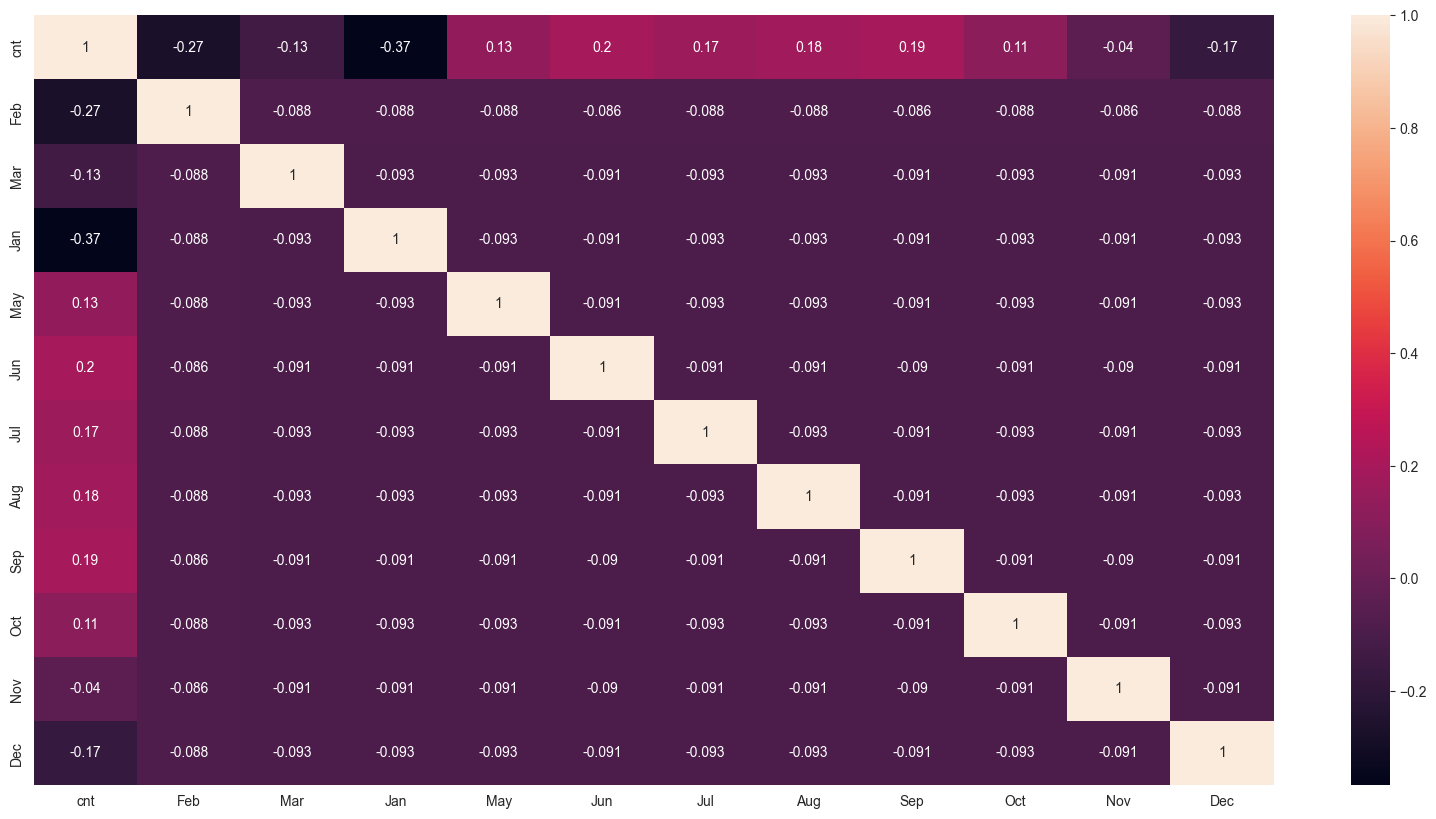

In [168]:
plt.figure(figsize = (20,10))
sns.heatmap(day[['cnt','Feb','Mar','Jan','May','Jun','Jul' ,'Aug','Sep','Oct','Nov','Dec']].corr(),annot = True)
plt.show()

* > Basically in the Summer Season when the sky is clear,BOOM Bikes can expect more number demand for Rent of Bikes.
* > Especially in July and August months,the demand is high

In [169]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   Spring      730 non-null    uint8  
 8   Summer      730 non-null    uint8  
 9   Winter      730 non-null    uint8  
 10  Aug         730 non-null    uint8  
 11  Dec         730 non-null    uint8  
 12  Feb         730 non-null    uint8  
 13  Jan         730 non-null    uint8  
 14  Jul         730 non-null    uint8  
 15  Jun         730 non-null    uint8  
 16  Mar         730 non-null    uint8  
 17  May         730 non-null    uint8  
 18  Nov         730 non-null    uint8  
 19  Oct         730 non-null    u

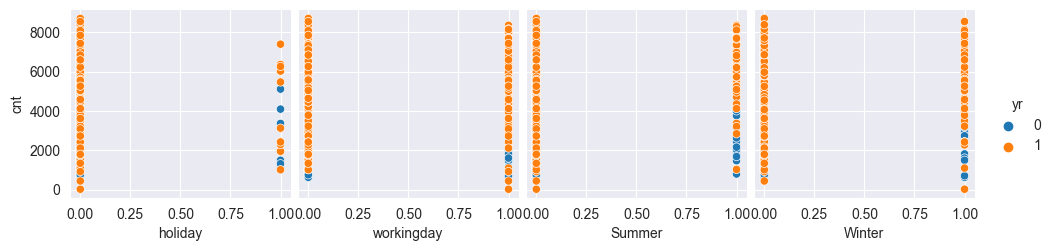

In [170]:
sns.pairplot(day,x_vars =['holiday', 'workingday','Summer','Winter'],y_vars='cnt',hue ='yr')
plt.show()

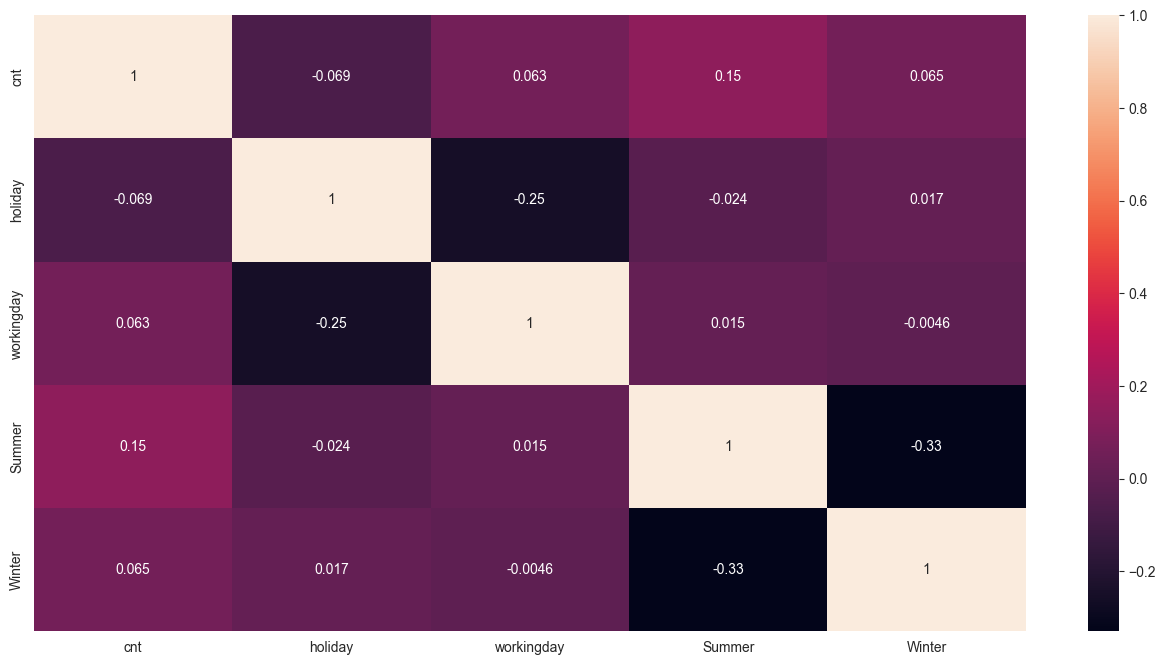

In [171]:
plt.figure(figsize = (16,8))
sns.heatmap(day[['cnt','holiday', 'workingday','Summer','Winter']].corr(),annot = True)
plt.show()

> **Most of the Bike has been rented during the weekdays**

> **Users Prefer to Rent Bike if the Environment is Clear**

> **Rent of bike is least on the Holiday**

> **More Number of Bike has been rented in the year 2019 than last year (2018) , it shows BOOM Bikes are doing Good Business.**

## **Data Modelling**

In [172]:
day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,LightSnow,Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [173]:
# Splitting the Data into Training and Testing Sets
df_train,df_test = train_test_split(day,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [174]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,LightSnow,Mist
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,1,1,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,1,0,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,1,1,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [175]:
# As we saw that Data we were unfiform across the all the Features hence Scaling is Required.
scaler = MinMaxScaler()

# Create a list of Numerical Variables which need to Scaled
num_vars = ['temp', 'windspeed',"hum",'cnt']

# For the Training Data Fit and Transform both need to done.
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

# View the Statistical Description to ensure MinMax Scaling has done properly
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537440,0.225858,0.0,0.339853,0.542596,0.735215,1.0
hum,510.0,0.650480,0.145846,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320883,0.169803,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513499,0.224421,0.0,0.356420,0.518638,0.684710,1.0
Spring,510.0,0.243137,0.429398,0.0,0.000000,0.000000,0.000000,1.0
Summer,510.0,0.247059,0.431725,0.0,0.000000,0.000000,0.000000,1.0
Winter,510.0,0.247059,0.431725,0.0,0.000000,0.000000,0.000000,1.0


> **We can see MinMax Scaling has been done properly for the Training Data as the Minimum
value is 0 for each of the Feature and Maximum value is 1 for each of the Feature**

In [176]:
# Preparation of Training Dataset
y_train = df_train.pop('cnt')
X_train = df_train
print(X_train.shape)
y_train.sample(5)

(510, 29)


492    0.656466
181    0.614358
347    0.427750
87     0.276461
60     0.242982
Name: cnt, dtype: float64

#### *Feature Selection using RFE(Recursive Feature Elimination)*

In [177]:
# Running RFE with the Output Number of variables equals to 15
lm = LinearRegression()
lm.fit(X_train,y_train)
# Running RFE
rfe = RFE(lm,n_features_to_select=15, step=1)
rfe = rfe.fit(X_train, y_train)

In [178]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 5),
 ('Feb', False, 6),
 ('Jan', False, 3),
 ('Jul', False, 2),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', False, 4),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 13),
 ('Clear', True, 1),
 ('LightSnow', True, 1),
 ('Mist', True, 1)]

In [179]:
# RFE Selected Features
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Sep', 'Saturday', 'Sunday', 'Clear', 'LightSnow',
       'Mist'],
      dtype='object')

In [180]:
# Features Rejected by the RFE
X_train.columns[~(rfe.support_)]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

***Building Model using statsmodels for the detailed statistics***

In [181]:
# Creating X train with RFE Selected Variables
X_train_rfe = X_train[col]

In [182]:
# Adding Constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create Object for the Model
lm = sm.OLS(y_train, X_train_rfe).fit()

# View Summary of Statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.7
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.29e-190
Time:                        12:01:25   Log-Likelihood:                 512.96
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     496   BIC:                            -938.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0856      0.024      3.525      0.000       0.038       0.133
yr             0.2305      0.008     28.521      0.000       0.215       0.246
holiday       -0.0458      0.021     -2.177      0.030      -0.087      -0.004
workingday     0.0555      0.009      6.004      0.000       0.037       0.074
temp           0.5122      0.033     15.479      0.000       0.447       0.577
hum           -0.1539      0.038     -4.095      0.000      -0.228      -0.080
windspeed     -0.1796      0.026     -7.010      0.000      -0.230      -0.129
Spring        -0.0437      0.020     -2.144      0.033      -0.084      -0.004
Summer         0.0697      0.014      5.007      0.000       0.042       0.097
Winter         0.1119      0.017      6.715      0.000       0.079       0.145
Sep            0.0965      0.016      6.057      0.000       0.065       0.128
Saturday       0.0649      0.011      5.764      0.000       0.043       0.087
Sunday         0.0110      0.012      0.917      0.359      -0.013       0.034
Clear          0.1299      0.010     13.440      0.000       0.111       0.149
LightSnow     -0.1181      0.021     -5.593      0.000      -0.160      -0.077
Mist           0.0738      0.011      6.477      0.000       0.051       0.096
==============================================================================
Omnibus:                       72.000   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.901
Skew:                          -0.737   Prob(JB):                     4.70e-38
Kurtosis:                       5.432   Cond. No.                     8.40e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.41e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

> As the Statistics Report say there is strong multicollinearity problems so we need to check for VIF

In [183]:
# Calculation of VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
11,Saturday,inf
12,Sunday,inf
13,Clear,inf
14,LightSnow,inf
15,Mist,inf
7,Spring,4.84
4,temp,3.53
9,Winter,3.27


In [184]:
# As VIF is Infnity for the Feature 'Clear' so we can drop it 
X_train_rfe = X_train_rfe.drop('Clear',axis=1)
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Spring', 'Summer', 'Winter', 'Sep', 'Saturday', 'Sunday', 'LightSnow',
       'Mist'],
      dtype='object')

In [185]:
# Add constant to all the Variables
X_train_sm = sm.add_constant(X_train_rfe)
# Create the Model
lr = sm.OLS(y_train, X_train_sm)
# Fit the Model
lr_model = lr.fit()
# View the Parameter of the Model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.7
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.29e-190
Time:                        12:01:32   Log-Likelihood:                 512.96
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     496   BIC:                            -938.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1895      0.028      6.832      0.000       0.135       0.244
yr             0.2305      0.008     28.521      0.000       0.215       0.246
holiday       -0.0198      0.021     -0.923      0.356      -0.062       0.022
workingday     0.0815      0.010      8.395      0.000       0.062       0.101
temp           0.5122      0.033     15.479      0.000       0.447       0.577
hum           -0.1539      0.038     -4.095      0.000      -0.228      -0.080
windspeed     -0.1796      0.026     -7.010      0.000      -0.230      -0.129
Spring        -0.0437      0.020     -2.144      0.033      -0.084      -0.004
Summer         0.0697      0.014      5.007      0.000       0.042       0.097
Winter         0.1119      0.017      6.715      0.000       0.079       0.145
Sep            0.0965      0.016      6.057      0.000       0.065       0.128
Saturday       0.0909      0.012      7.762      0.000       0.068       0.114
Sunday         0.0369      0.012      3.004      0.003       0.013       0.061
LightSnow     -0.2480      0.026     -9.440      0.000      -0.300      -0.196
Mist          -0.0561      0.010     -5.355      0.000      -0.077      -0.035
==============================================================================
Omnibus:                       72.000   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.901
Skew:                          -0.737   Prob(JB):                     4.70e-38
Kurtosis:                       5.432   Cond. No.                     3.65e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [186]:
# Again Checking the VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
11,Saturday,inf
12,Sunday,inf
7,Spring,4.84
4,temp,3.53
9,Winter,3.27
8,Summer,2.29
5,hum,1.90
14,Mist,1.57


In [187]:
# As VIF is Infnity for the Feature 'Sunday' so we can drop it 
X_train_rfe = X_train_rfe.drop('Sunday',axis=1)
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Spring', 'Summer', 'Winter', 'Sep', 'Saturday', 'LightSnow', 'Mist'],
      dtype='object')

In [188]:
# Add constant to all the Variables
X_train_sm = sm.add_constant(X_train_rfe)
# Create the Model
lr = sm.OLS(y_train, X_train_sm)
# Fit the Model
lr_model = lr.fit()
# View the Parameter of the Model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.7
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.29e-190
Time:                        12:01:39   Log-Likelihood:                 512.96
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     496   BIC:                            -938.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2264      0.036      6.331      0.000       0.156       0.297
yr             0.2305      0.008     28.521      0.000       0.215       0.246
holiday       -0.0567      0.027     -2.088      0.037      -0.110      -0.003
workingday     0.0446      0.012      3.829      0.000       0.022       0.067
temp           0.5122      0.033     15.479      0.000       0.447       0.577
hum           -0.1539      0.038     -4.095      0.000      -0.228      -0.080
windspeed     -0.1796      0.026     -7.010      0.000      -0.230      -0.129
Spring        -0.0437      0.020     -2.144      0.033      -0.084      -0.004
Summer         0.0697      0.014      5.007      0.000       0.042       0.097
Winter         0.1119      0.017      6.715      0.000       0.079       0.145
Sep            0.0965      0.016      6.057      0.000       0.065       0.128
Saturday       0.0539      0.015      3.680      0.000       0.025       0.083
LightSnow     -0.2480      0.026     -9.440      0.000      -0.300      -0.196
Mist          -0.0561      0.010     -5.355      0.000      -0.077      -0.035
==============================================================================
Omnibus:                       72.000   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.901
Skew:                          -0.737   Prob(JB):                     4.70e-38
Kurtosis:                       5.432   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
# Again Checking the VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,81.02
7,Spring,4.84
4,temp,3.53
9,Winter,3.27
8,Summer,2.29
5,hum,1.90
3,workingday,1.88
11,Saturday,1.78
13,Mist,1.57
12,LightSnow,1.25


In [190]:
X_train_rfe.shape

(510, 14)

>  **We have Prob(F-statistic) is very low Which tells Overall model is a good Fit.**

>  **We got quite Good Adjusted R2 Score i.e 84.4%** 

>  **All the P Value are less than 0.05, Which say that all the 13 Features are Statistically Significant**

>  **Hence we can go ahaed with the current Model for Prediction and Evaluation.**

## **Residual Analysis**

In [191]:
# Calculation of Error in Prediction for Training Data
y_train_pred = lr_model.predict(X_train_sm)
res = (y_train - y_train_pred)

### *Looking for the Assumption : Normality*

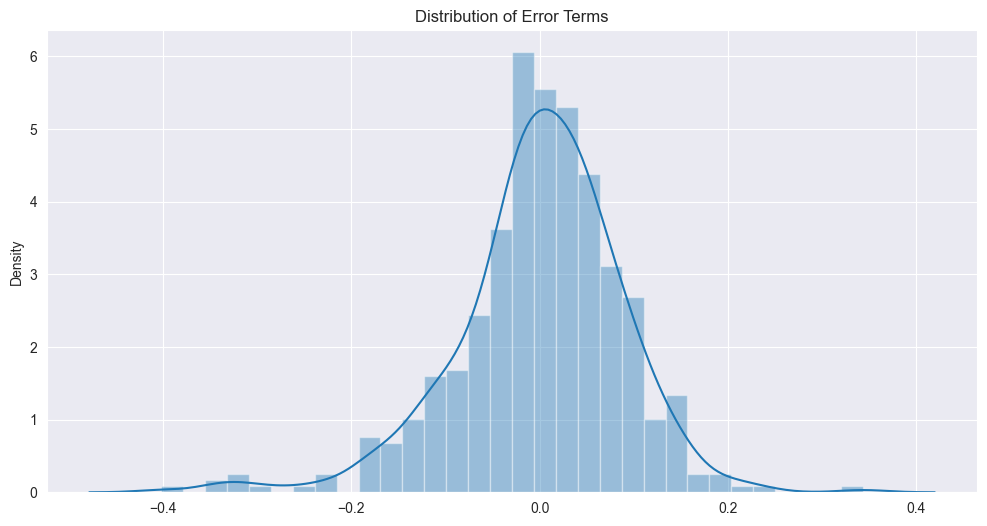

In [192]:
# Ploting of Residuals
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.distplot(res)
plt.title('Distribution of Error Terms')
plt.show()

> **We can see Error Terms are normally Distributed with mean Zero. Hence Model is Actaully obeying the assumption of Normality**.

### *Looking for patterns in the residuals*

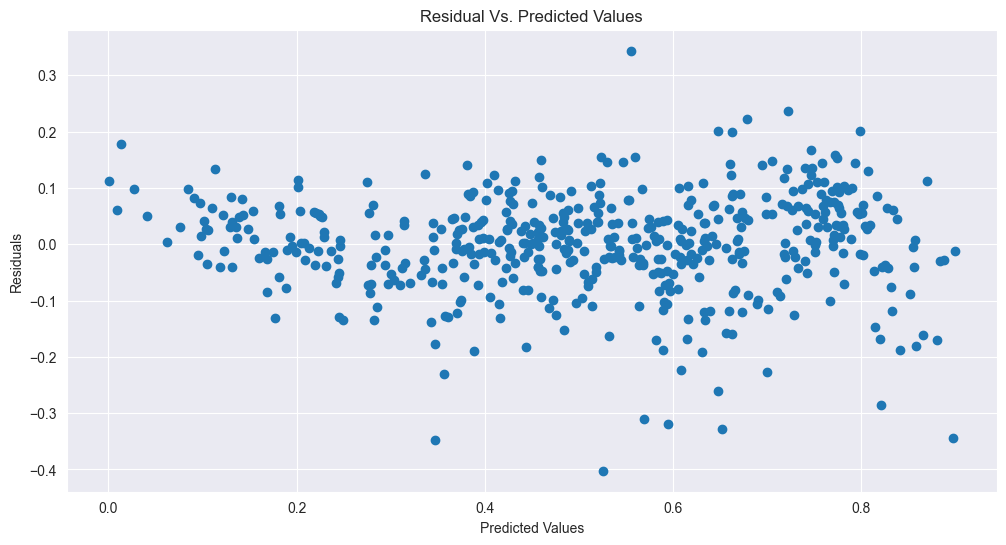

In [193]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

> **We can see there is no specific Pattern observed in the Error Terms with respect to Prediction, hence we can say
Error terms are independent of each other.** 

### *Looking for Constant Variance*

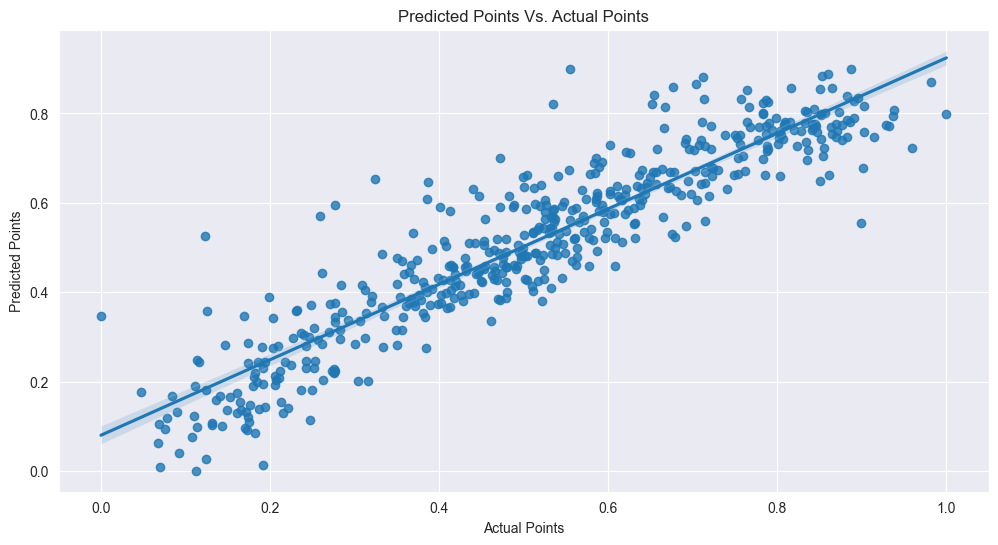

In [194]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

> **We can see Error Terms have approximatly a Constant Variance, Hence it follows the Assumption of Homoscedasticity**

## **Model Evaluation on Test Dataset**

#### *Applying the MinMax scaling on the test sets*

In [195]:
num_vars = ['temp','windspeed',"hum",'cnt']

df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()
y_test = df_test.pop('cnt')
X_test = df_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,...,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,LightSnow,Mist
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,1,1,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,...,0,0,0,0,1,0,0,0,0,1
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,1,1,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [197]:
print(X_test_sm.head())
#Dropping the Features which were eliminated during the Training Process
X_test_sm = X_test_sm.drop(['Sunday','Clear','Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun','Mar', 'May', 'Nov', 'Oct','Monday','Thursday','Tuesday', 'Wednesday'],axis=1)

# Predict the Price for Test Data using the Trainned Model
y_test_pred = lr_model.predict(X_test_sm)

y_test_pred.head()

     const  yr  holiday  workingday      temp       hum  windspeed  Spring  \
184    1.0   0        1           0  0.831783  0.657364   0.084219       0   
535    1.0   1        0           1  0.901354  0.610133   0.153728       0   
299    1.0   0        0           1  0.511964  0.837699   0.334206       0   
221    1.0   0        0           1  0.881625  0.437098   0.339570       0   
152    1.0   0        0           1  0.817246  0.314298   0.537414       0   

     Summer  Winter  ...  Sep  Monday  Saturday  Sunday  Thursday  Tuesday  \
184       0       0  ...    0       1         0       0         0        0   
535       1       0  ...    0       0         0       0         0        0   
299       0       1  ...    0       0         0       0         1        0   
221       0       0  ...    0       0         0       0         0        0   
152       1       0  ...    0       0         0       0         1        0   

     Wednesday  Clear  LightSnow  Mist  
184          0      0

184    0.423413
535    0.911442
299    0.400187
221    0.594344
152    0.614479
dtype: float64

In [198]:
X_test_sm .columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Spring', 'Summer', 'Winter', 'Sep', 'Saturday', 'LightSnow', 'Mist'],
      dtype='object')

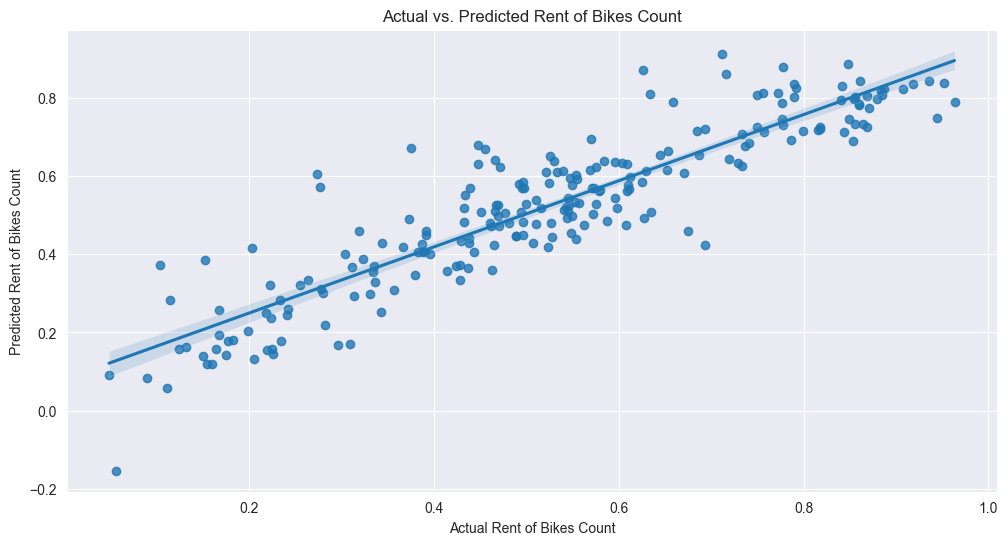

In [199]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

> ***Above Scatter Plot Shows the Linear Relationship between Actual Rent of Bikes Count and Predicted Rent of Bikes Count.***

In [200]:
# Checking the Accuracy of the Test Model
r2_score(y_test,y_test_pred)

0.8153712176994273

> **The Final Model accuray is around 81.5%.**

> **The Model accuracy difference between the Train and Test Data is less than 3% .**



In [201]:
Cofficients = round(lr_model.params,2)
beta = Cofficients.sort_values(ascending = False)
beta

temp          0.51
const         0.23
yr            0.23
Winter        0.11
Sep           0.10
Summer        0.07
Saturday      0.05
workingday    0.04
Spring       -0.04
holiday      -0.06
Mist         -0.06
hum          -0.15
windspeed    -0.18
LightSnow    -0.25
dtype: float64

In [202]:
for i in range(0, len(beta)):
    print(beta[i],'*',beta.index[i],end ='')
    print(' + ',end ='')

0.51 * temp + 0.23 * const + 0.23 * yr + 0.11 * Winter + 0.1 * Sep + 0.07 * Summer + 0.05 * Saturday + 0.04 * workingday + -0.04 * Spring + -0.06 * holiday + -0.06 * Mist + -0.15 * hum + -0.18 * windspeed + -0.25 * LightSnow + 

> **Equation of Best Fit Line :**

> **cnt = 0.51 * temp + 0.23 * yr  + 0.11 * winter + 0.1 * Sep + 0.07 * summer + 0.05 * Saturday + 0.04 * workingday - 0.04 * Spring - 0.06 * holiday - 0.06 * Mist - 0.15 * hum - 0.18 * windspeed - 0.25 * LightSnow + 0.23**

## ***Insights:*** 

> **Temperature is the Most Significant Feature which affects the Business positively,**  
 
> **Whereas  the other Environmental condition such as spring, Mist, Humidity, Windspeed and Cloudy affects the Business negatively.**
 

> **The Demand of Bikes is more in the Winter and Summer season, mostly user don't like to travel using Bikes in Rainy Day or Rainy Season.** 


> **It is interesting to see Specially Saturday People like to Rent a Bike more than other usual Days** 
   

> **Demand of Bike Rent has been significantly increased in the 2019 than 2018 so it is clear sign that Boom Bikes is doing a Business.** 

